# **Factors affecting student GPA**

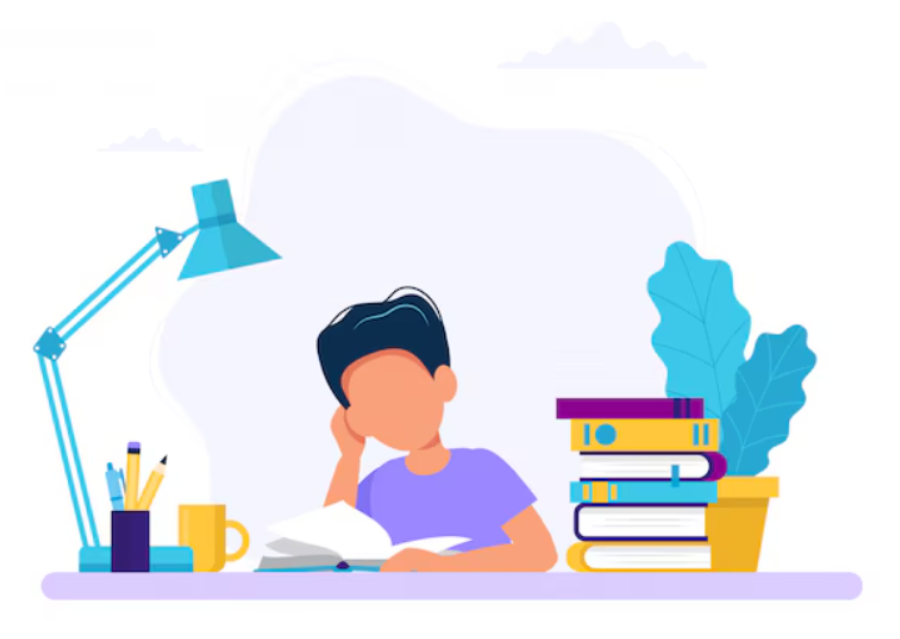

This project aims to examine the relationship between different variables and the GPA.

The dataset contains information from 500 students.

It includes details about student ID, gender, age, hours of study per week, attendance rate, GPA, major, part time job, extra curricular activities

## 👣 **The First Steps**

### 📥 **Data import**

Let's import the needed libraries: Pandas, Matplotlib, Seaborn and Statsmodels.api

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Then load data from the following link: https://docs.google.com/spreadsheets/d/100Oi5G3z18zjXnKoWENDCQTnJtcoaprLC0JZ6-3gP3k

In [ ]:
google_sheet_id = '100Oi5G3z18zjXnKoWENDCQTnJtcoaprLC0JZ6-3gP3k'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
data = pd.read_excel(url)

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
data.head(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


We don't have any null value, but we have string columns considered as objects.

Let's fix their types and make them string:

In [ ]:
data[["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"]] = data[["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"]].astype('string')

Check again (output columns and their types):

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    string 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    string 
 7   PartTimeJob                500 non-null    string 
 8   ExtraCurricularActivities  500 non-null    string 
dtypes: float64(2), int64(3), string(4)
memory usage: 35.3 KB


We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
data.describe()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,20.956000,19.876000,74.990380,2.98516
std,144.481833,2.000517,11.471347,14.565917,0.56362
min,1.000000,18.000000,1.000000,50.010000,2.00000
25%,125.750000,19.000000,10.000000,62.607500,2.48750
50%,250.500000,21.000000,20.500000,75.730000,3.00000
75%,375.250000,23.000000,30.000000,87.220000,3.48000
max,500.000000,24.000000,39.000000,99.970000,3.99000


We don't have any outlier.

## **💯 GPA influencers**

### **👨👩 Does gender affect GPA?**

Let's figure out the difference between male and female students in terms of their GPA.

#### **Separate male and female students**

Create a new dataframe `male_df` containing only info about male students.

In [ ]:
male_df = pd.DataFrame(data = data[data.Gender == 'Male'])

Check whether everything is okay. Output a test sample (5 random rows):


In [ ]:
male_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
214,215,Male,19,20,96.50,2.68,Arts,Yes,Yes
484,485,Male,18,9,84.41,2.33,Engineering,Yes,Yes
123,124,Male,18,35,69.91,2.51,Education,No,No
297,298,Male,22,36,78.14,2.81,Engineering,No,Yes
160,161,Male,23,30,91.31,3.29,Arts,No,No


Also create another dataframe `female_df` containing only female students.

In [ ]:
female_df = pd.DataFrame(data = data[data.Gender == 'Female'])

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
female_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
195,196,Female,21,12,55.47,2.95,Science,Yes,No
477,478,Female,23,10,52.58,3.56,Arts,Yes,No
34,35,Female,20,11,74.19,3.30,Science,No,Yes
436,437,Female,21,24,54.87,2.83,Engineering,No,Yes
235,236,Female,18,1,68.83,2.28,Science,Yes,No


#### **Compare their measures of central tendency and their distribution**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🏫 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the 'GPA' column through the whole dataset and save them into the following variables:

- min => `common_gpa_min`
- max => `common_gpa_max`
- mean => `common_gpa_mean`
- median => `common_gpa_median`

In [ ]:
common_gpa_min = data.GPA.min()
common_gpa_max = data.GPA.max()
common_gpa_mean = data.GPA.mean()
common_gpa_median = data.GPA.median()

Let's show the resulting values for whole dataset

In [ ]:
# Make a list of values
common_values = [common_gpa_min, common_gpa_max, common_gpa_mean, common_gpa_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,2.0000
max,3.9900
mean,2.9852
median,3.0000


##### **👨 Male students**

Do the same taking into account only male students. Use the following variables:

- min => `male_gpa_min`
- max => `male_gpa_max`
- mean => `male_gpa_mean`
- median => `male_gpa_median`

In [ ]:
male_gpa_min = male_df.GPA.min()
male_gpa_max = male_df.GPA.max()
male_gpa_mean = male_df.GPA.mean()
male_gpa_median = male_df.GPA.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for male students as we did for whole dataset. Then output it.

In [ ]:
# Make a list of values
male_df_values = [male_gpa_min, male_gpa_max, male_gpa_mean, male_gpa_median]
# Round all the values to 4 decimal places
male_df_values = map(lambda x: round(x, 4), male_df_values)

# Make a dataframe from the list
male_df_mct = pd.DataFrame(male_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_df_mct

,0
min,2.0000
max,3.9900
mean,2.9745
median,2.9950


##### **👩 Female students**

Now repeat it for female students. Use the following variables:

- min => `female_gpa_min`
- max => `female_gpa_max`
- mean => `female_gpa_mean`
- median => `female_gpa_median`

In [ ]:
female_gpa_min = female_df.GPA.min()
female_gpa_max = female_df.GPA.max()
female_gpa_mean = female_df.GPA.mean()
female_gpa_median = female_df.GPA.median()

Make the same dataframe containing the measures of central tendency for female students. Then output it.

In [ ]:
# Make a list of values
female_df_values = [female_gpa_min, female_gpa_max, female_gpa_mean, female_gpa_median]
# Round all the values to 4 decimal places
female_df_values = map(lambda x: round(x, 4), female_df_values)

# Make a dataframe from the list
female_df_mct = pd.DataFrame(female_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_df_mct

,0
min,2.0000
max,3.9900
mean,2.9954
median,3.0150


##### **🆚 Comparison**

**Measures of central tendency**

Let's show the retrieved results together

In [ ]:
all_vals_dict = {
    'Common': {'min': common_gpa_min, 'max': common_gpa_max, 'mean': common_gpa_mean, 'median': common_gpa_median},
    'Male': {'min': male_gpa_min, 'max': male_gpa_max, 'mean': male_gpa_mean, 'median': male_gpa_median},
    'Female': {'min': female_gpa_min, 'max': female_gpa_max, 'mean': female_gpa_mean, 'median': female_gpa_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Male,Female
min,2.00000,2.000000,2.000000
max,3.99000,3.990000,3.990000
mean,2.98516,2.974467,2.995352
median,3.00000,2.995000,3.015000


**Histograms**

Plot the histograms for the whole dataset, the male_df and female_df GPA distribution.

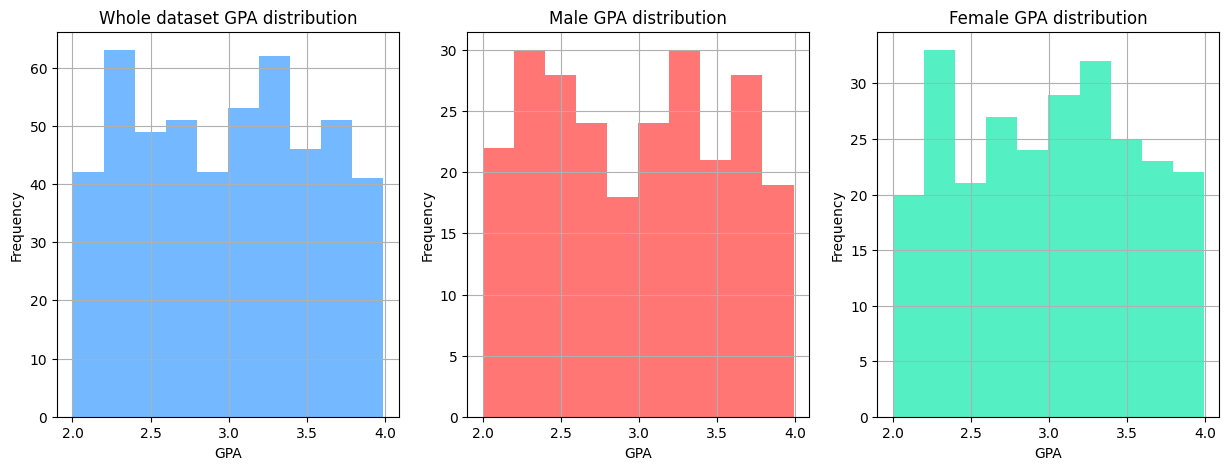

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.GPA, color = '#74b9ff')
axis[0].set_xlabel('GPA')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset GPA distribution')
axis[0].grid(True)

#Smokers
axis[1].hist(male_df.GPA, color = '#ff7675')
axis[1].set_xlabel('GPA')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Male GPA distribution')
axis[1].grid(True)

#Non_smokers
axis[2].hist(female_df.GPA, color = '#55efc4')
axis[2].set_xlabel('GPA')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Female GPA distribution')
axis[2].grid(True)


##### **📝 Conclusion**

Based on measures of central tendency comparison and distribution comparison, we confirm that gender has an effect on GPA. Female students have higher GPA than male students.

### **💼 Does part time work affect GPA?**

Perform the same steps based on the column 'PartTimeJob'.

#### **Separate students with part time job and those without**

Create a new dataframe `has_ptj_df` containing only info about students with part time job.

In [ ]:
has_ptj_df = pd.DataFrame(data = data[data.PartTimeJob == 'Yes'])

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
has_ptj_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
490,491,Female,23,4,98.65,3.45,Engineering,Yes,Yes
481,482,Female,22,17,54.43,2.00,Education,Yes,No
209,210,Male,20,23,62.26,3.01,Arts,Yes,No
470,471,Male,24,30,93.21,3.51,Arts,Yes,No
329,330,Female,19,36,98.73,3.62,Arts,Yes,Yes


Also create another one dataframe `no_ptj_df` containing only info about students without part-time job.

In [ ]:
no_ptj_df = pd.DataFrame(data = data[data.PartTimeJob == 'No'])

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
no_ptj_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
495,496,Male,22,37,76.61,2.97,Science,No,No
140,141,Female,18,10,97.82,2.41,Engineering,No,Yes
124,125,Male,22,15,54.58,2.60,Engineering,No,Yes
380,381,Female,21,20,86.24,3.95,Education,No,No
365,366,Male,23,27,64.94,3.98,Engineering,No,No


#### **Compare their measures of central tendency and their distribution**

##### **🤵 Students with part-time job**

Calculate measures of central tendency for student with a part-time job and save them into the following variables:

- min => `has_ptj_df_gpa_min`
- max => `has_ptj_df_gpa_max`
- mean => `has_ptj_df_gpa_mean`
- median => `has_ptj_df_gpa_median`

In [ ]:
has_ptj_df_gpa_min = has_ptj_df.GPA.min()
has_ptj_df_gpa_max = has_ptj_df.GPA.max()
has_ptj_df_gpa_mean = has_ptj_df.GPA.mean()
has_ptj_df_gpa_median = has_ptj_df.GPA.median()

Let's show the resulting values for students with part-time job:

In [ ]:
# Make a list of values
has_ptj_df_values = [has_ptj_df_gpa_min, has_ptj_df_gpa_max, has_ptj_df_gpa_mean, has_ptj_df_gpa_median]
# Round all the values to 4 decimal places
has_ptj_df_values = map(lambda x: round(x, 4), has_ptj_df_values)

# Make a dataframe from the list
has_ptj_df_mct = pd.DataFrame(has_ptj_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
has_ptj_df_mct

,0
min,2.0000
max,3.9900
mean,3.0063
median,3.0100


##### **📚 Without part-time job**

Calculate measures of central tendency for students without a part-time job and save them into the following variables:

- min => `no_ptj_gpa_min`
- max => `no_ptj_gpa_max`
- mean => `no_ptj_gpa_mean`
- median => `no_ptj_gpa_median`

In [ ]:
no_ptj_df_gpa_min = no_ptj_df.GPA.min()
no_ptj_df_gpa_max = no_ptj_df.GPA.max()
no_ptj_df_gpa_mean = no_ptj_df.GPA.mean()
no_ptj_df_gpa_median = no_ptj_df.GPA.median()

Let's show the resulting values for students without part-time job:

In [ ]:
# Make a list of values
no_ptj_df_values = [no_ptj_df_gpa_min, no_ptj_df_gpa_max, no_ptj_df_gpa_mean, no_ptj_df_gpa_median]
# Round all the values to 4 decimal places
no_ptj_df_values = map(lambda x: round(x, 4), no_ptj_df_values)

# Make a dataframe from the list
no_ptj_df_mct = pd.DataFrame(no_ptj_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
no_ptj_df_mct

,0
min,2.0200
max,3.9800
mean,2.9607
median,2.9700


##### **🆚 Comparison**

**Measures of central tendency**

Let's show the retrieved results together

In [ ]:
all_vals_dict_1 = {
    'Common': {'min': common_gpa_min, 'max': common_gpa_max, 'mean': common_gpa_mean, 'median': common_gpa_median},
    'With part-time job': {'min': has_ptj_df_gpa_min, 'max': has_ptj_df_gpa_max, 'mean': has_ptj_df_gpa_mean, 'median': has_ptj_df_gpa_median},
    'Without part-time job': {'min': no_ptj_df_gpa_min, 'max': no_ptj_df_gpa_max, 'mean': no_ptj_df_gpa_mean, 'median': no_ptj_df_gpa_median}
}

# Make a dataframe
all_mct_1 = pd.DataFrame(all_vals_dict_1)
# Output the dataframe
all_mct_1

,Common,With part-time job,Without part-time job
min,2.00000,2.000000,2.02000
max,3.99000,3.990000,3.98000
mean,2.98516,3.006343,2.96069
median,3.00000,3.010000,2.97000


**Histograms**

Plot the histograms for the whole dataset, the has_ptj_df and no_ptj_df GPA distribution.

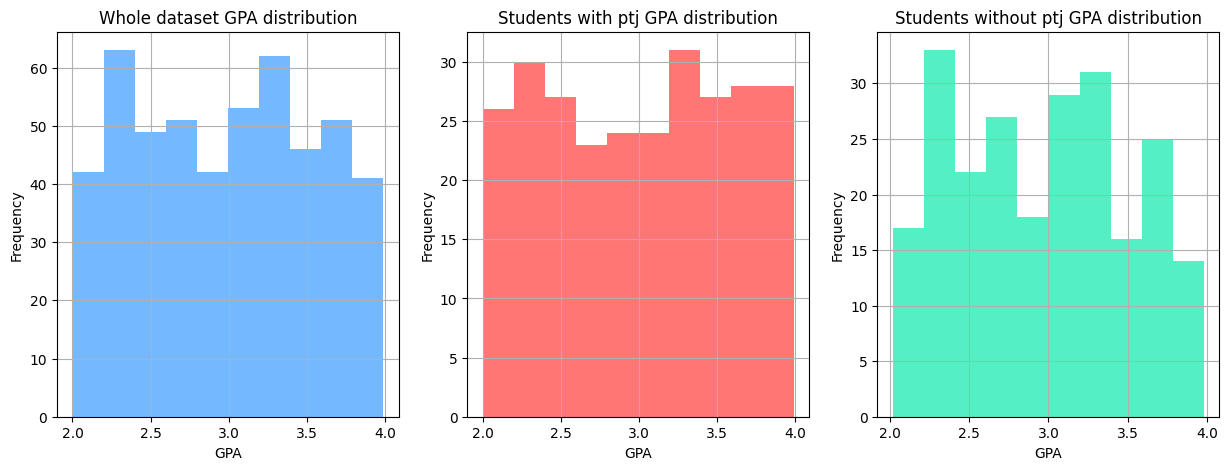

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.GPA, color = '#74b9ff')
axis[0].set_xlabel('GPA')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset GPA distribution')
axis[0].grid(True)

#Smokers
axis[1].hist(has_ptj_df.GPA, color = '#ff7675')
axis[1].set_xlabel('GPA')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Students with ptj GPA distribution')
axis[1].grid(True)

#Non_smokers
axis[2].hist(no_ptj_df.GPA, color = '#55efc4')
axis[2].set_xlabel('GPA')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Students without ptj GPA distribution')
axis[2].grid(True)


##### **📝 Conclusion**

Based on measures of central tendency comparison and distribution comparison, we can confirm that having a part-time job has a effect on GPA, but that effect can be negative or positive depending on the student.

### **🤸 Do extracurricular activities affect GPA?**

Perform the same steps based on the column 'ExtraCurricularActivities'

#### **Separate students who participate in extracurricular activities and those who do not**

Create a new dataframe `has_eca_df` containing only info about students who participate in extracurricular activities

In [ ]:
has_eca_df = pd.DataFrame(data = data[data.ExtraCurricularActivities == 'Yes'])

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
has_eca_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
137,138,Male,20,20,55.47,2.36,Science,No,Yes
487,488,Female,18,39,84.30,2.80,Business,Yes,Yes
264,265,Male,23,17,91.08,3.87,Education,Yes,Yes
433,434,Female,21,34,70.65,2.98,Business,Yes,Yes
485,486,Female,20,2,69.87,2.36,Education,Yes,Yes


Also create another one dataframe `no_eca_df` containing only info about students who do not participate in extracurricular activities

In [ ]:
no_eca_df = pd.DataFrame(data = data[data.ExtraCurricularActivities == 'No'])

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
no_eca_df.sample(5)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
197,198,Female,18,26,99.57,2.24,Business,No,No
438,439,Male,23,32,79.65,3.49,Education,Yes,No
192,193,Male,20,20,52.44,2.00,Arts,Yes,No
196,197,Female,20,1,94.72,2.77,Business,Yes,No
361,362,Male,22,7,94.81,2.07,Education,No,No


#### **Compare their measures of central tendency and their distribution**

##### **🤸 Students participate in extracurricular activities**

Calculate measures of central tendency for students who participate in extracurricular activities and save them into the following variables:

- min => `has_eca_df_gpa_min`
- max => `has_eca_df_gpa_max`
- mean => `has_eca_df_gpa_mean`
- median => `has_eca_df_gpa_median`

In [ ]:
has_eca_df_gpa_min = has_eca_df.GPA.min()
has_eca_df_gpa_max = has_eca_df.GPA.max()
has_eca_df_gpa_mean = has_eca_df.GPA.mean()
has_eca_df_gpa_median = has_eca_df.GPA.median()

Let's show the resulting values for students who participate in extracurricular activities:

In [ ]:
# Make a list of values
has_eca_df_values = [has_eca_df_gpa_min, has_eca_df_gpa_max, has_eca_df_gpa_mean, has_eca_df_gpa_median]
# Round all the values to 4 decimal places
has_eca_df_values = map(lambda x: round(x, 4), has_eca_df_values)

# Make a dataframe from the list
has_eca_df_mct = pd.DataFrame(has_eca_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
has_eca_df_mct

,0
min,2.0000
max,3.9900
mean,3.0081
median,3.0050


##### **✍🏻 Students do not participate in extracurricular activities**

Calculate measures of central tendency for students who do not participate in extracurricular activities and save them into the following variables:

- min => `no_eca_gpa_min`
- max => `no_eca_gpa_max`
- mean => `no_eca_gpa_mean`
- median => `no_eca_gpa_median`

In [ ]:
no_eca_df_gpa_min = no_eca_df.GPA.min()
no_eca_df_gpa_max = no_eca_df.GPA.max()
no_eca_df_gpa_mean = no_eca_df.GPA.mean()
no_eca_df_gpa_median = no_eca_df.GPA.median()

Let's show the resulting values for students without part-time job:

In [ ]:
# Make a list of values
no_eca_df_values = [no_eca_df_gpa_min, no_eca_df_gpa_max, no_eca_df_gpa_mean, no_eca_df_gpa_median]
# Round all the values to 4 decimal places
no_eca_df_values = map(lambda x: round(x, 4), no_eca_df_values)

# Make a dataframe from the list
no_eca_df_mct = pd.DataFrame(no_eca_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
no_eca_df_mct

,0
min,2.000
max,3.980
mean,2.964
median,2.995


##### **🆚 Comparison**

**Measures of central tendency**

Let's show the retrieved results together

In [ ]:
all_vals_dict_2 = {
    'Common': {'min': common_gpa_min, 'max': common_gpa_max, 'mean': common_gpa_mean, 'median': common_gpa_median},
    'With eca': {'min': has_eca_df_gpa_min, 'max': has_eca_df_gpa_max, 'mean': has_eca_df_gpa_mean, 'median': has_eca_df_gpa_median},
    'Without eca': {'min': no_eca_df_gpa_min, 'max': no_eca_df_gpa_max, 'mean': no_eca_df_gpa_mean, 'median': no_eca_df_gpa_median}
}

# Make a dataframe
all_mct_2 = pd.DataFrame(all_vals_dict_2)
# Output the dataframe
all_mct_2

,Common,With eca,Without eca
min,2.00000,2.000000,2.000
max,3.99000,3.990000,3.980
mean,2.98516,3.008083,2.964
median,3.00000,3.005000,2.995


**Histograms**

Plot the histograms for the whole dataset, the has_eca_df and no_eca_df GPA distribution.

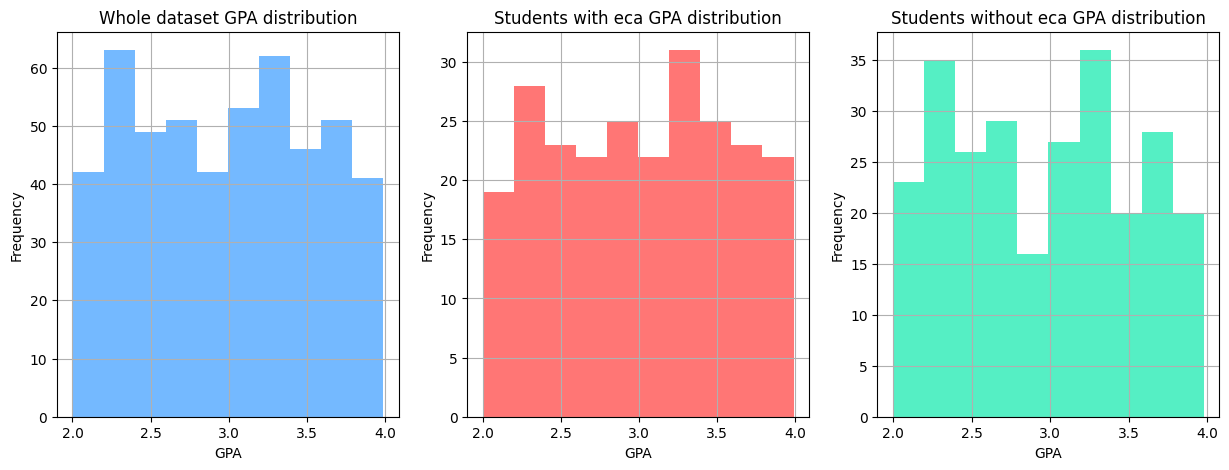

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.GPA, color = '#74b9ff')
axis[0].set_xlabel('GPA')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset GPA distribution')
axis[0].grid(True)

#Smokers
axis[1].hist(has_eca_df.GPA, color = '#ff7675')
axis[1].set_xlabel('GPA')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Students with eca GPA distribution')
axis[1].grid(True)

#Non_smokers
axis[2].hist(no_eca_df.GPA, color = '#55efc4')
axis[2].set_xlabel('GPA')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Students without eca GPA distribution')
axis[2].grid(True)


##### **📝 Conclusion**

Based on measures of central tendency comparison and distribution comparison, we can confirm that participating in extracurricular activities has positive effects on GPA.

### **👨🏻‍💻  Correlation matrix**

#### **One-hot encoding**

Using the "one-hot encoding" method convert categorical columns to numeric

In [ ]:
obj_columns = data.select_dtypes(include='object').columns
encoded_data = pd.get_dummies(data.drop(columns=['StudentID']), columns = obj_columns)

Showing 5 first rows

In [ ]:
encoded_data.head(5)

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Gender_Female,Gender_Male,Major_Arts,Major_Business,Major_Education,Major_Engineering,Major_Science,PartTimeJob_No,PartTimeJob_Yes,ExtraCurricularActivities_No,ExtraCurricularActivities_Yes
0,24,37,90.75,3.47,False,True,True,False,False,False,False,False,True,True,False
1,22,37,74.90,2.32,True,False,False,False,True,False,False,True,False,True,False
2,22,10,53.36,2.38,False,True,False,True,False,False,False,True,False,True,False
3,24,10,70.26,3.46,False,True,False,False,False,False,True,False,True,True,False
4,18,19,74.87,2.31,False,True,False,False,True,False,False,False,True,True,False


#### **Building heat map**

In [ ]:
corr_matrix = encoded_data.corr()
corr_matrix

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Gender_Female,Gender_Male,Major_Arts,Major_Business,Major_Education,Major_Engineering,Major_Science,PartTimeJob_No,PartTimeJob_Yes,ExtraCurricularActivities_No,ExtraCurricularActivities_Yes
Age,1.000000,-0.015695,0.037364,0.095805,-0.081556,0.081556,-0.046535,-0.023815,-0.022099,0.064947,0.028717,0.028511,-0.028511,-0.011137,0.011137
StudyHoursPerWeek,-0.015695,1.000000,0.095716,0.091700,0.013178,-0.013178,-0.015969,0.038743,0.045030,-0.017535,-0.055736,0.010767,-0.010767,-0.003409,0.003409
AttendanceRate,0.037364,0.095716,1.000000,0.060828,0.065842,-0.065842,-0.023114,0.011423,0.033539,0.033138,-0.061350,0.026235,-0.026235,-0.023469,0.023469
GPA,0.095805,0.091700,0.060828,1.000000,0.018540,-0.018540,0.019483,0.049036,-0.040337,-0.011549,-0.020858,-0.040436,0.040436,-0.039115,0.039115
Gender_Female,-0.081556,0.013178,0.065842,0.018540,1.000000,-1.000000,0.038011,-0.013047,-0.087667,0.040623,0.022265,0.009756,-0.009756,-0.065031,0.065031
Gender_Male,0.081556,-0.013178,-0.065842,-0.018540,-1.000000,1.000000,-0.038011,0.013047,0.087667,-0.040623,-0.022265,-0.009756,0.009756,0.065031,-0.065031
Major_Arts,-0.046535,-0.015969,-0.023114,0.019483,0.038011,-0.038011,1.000000,-0.271724,-0.245303,-0.263994,-0.218218,-0.004010,0.004010,-0.070056,0.070056
Major_Business,-0.023815,0.038743,0.011423,0.049036,-0.013047,0.013047,-0.271724,1.000000,-0.266620,-0.286935,-0.237181,-0.008565,0.008565,0.016412,-0.016412
Major_Education,-0.022099,0.045030,0.033539,-0.040337,-0.087667,0.087667,-0.245303,-0.266620,1.000000,-0.259035,-0.214118,-0.020365,0.020365,0.096783,-0.096783
Major_Engineering,0.064947,-0.017535,0.033138,-0.011549,0.040623,-0.040623,-0.263994,-0.286935,-0.259035,1.000000,-0.230433,0.004118,-0.004118,0.012798,-0.012798


Then plot it as a heatmap using Seaborn:

Text(0.5, 1.0, 'Correlation Matrix')

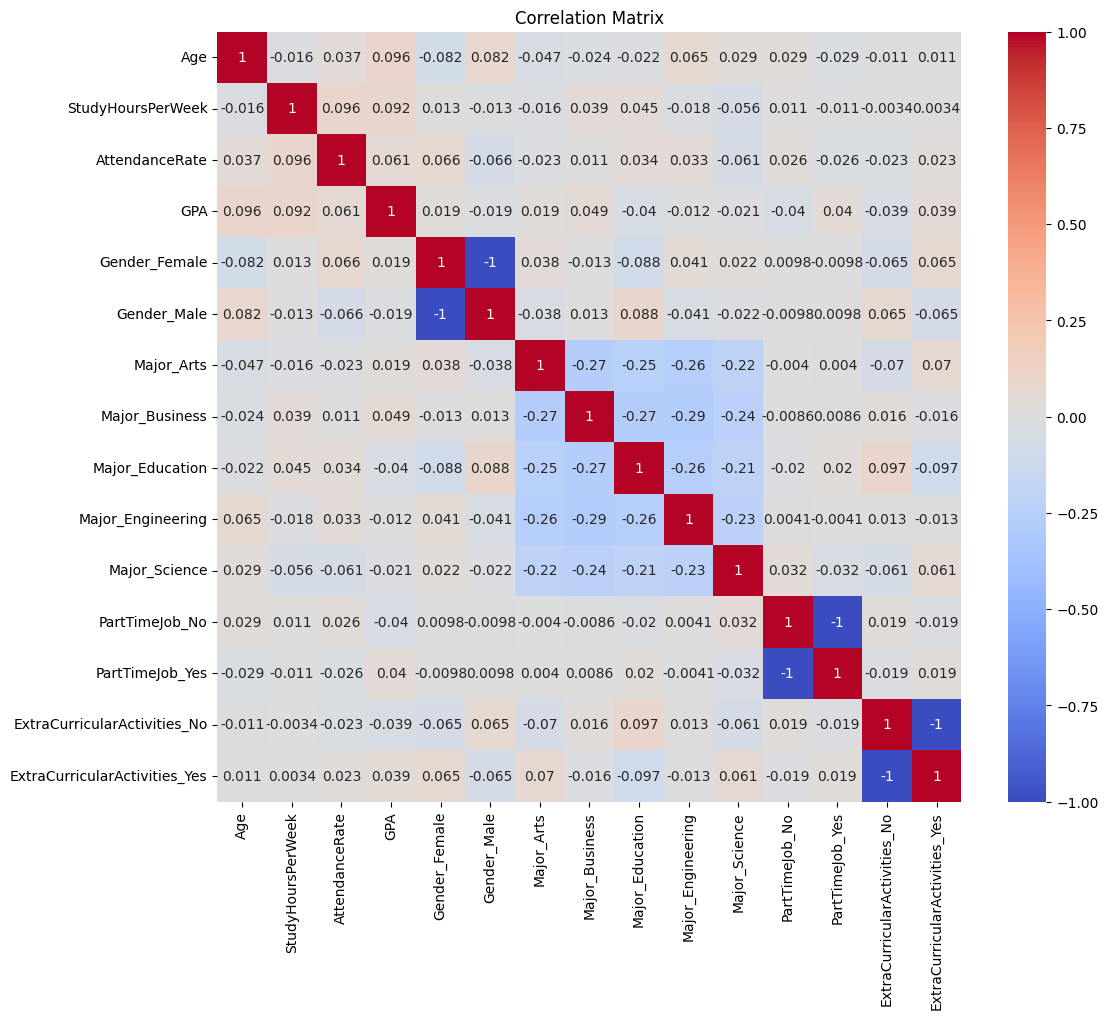

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

##### **📝 Conclusion**

Based on correlation matrix, we can confirm that age, study hours per week and attendance rate have no effect on GPA.

## **⭐ Recommendations**

- Teachers pay more attention to male students' concentration during learning process.
- Encourage students to have suitable part-time jobs that do not affect their academic performance.
- Encourage students to participate in extracurricular activities.